In [1]:
import numpy as np
import pandas as pd
import neuroseries as nts


import time
import matplotlib.pyplot as plt
%matplotlib qt

import seaborn as sns 

import basefunction.assembly as assembly

import bk.load
import bk.plot
import basefunction.anass_load as at

In [10]:
%matplotlib inline

In [49]:
def binSpikes(neurons,binSize = 0.025,start = 0,stop = 0):
    if stop == 0:
        stop = np.max([neuron.as_units('s').index[-1] for neuron in neurons])
    bins = np.arange(start,stop,binSize)
    binned = []
    for neuron in neurons:
        hist,b = np.histogram(neuron.as_units('s').index,bins = bins)
        binned.append(hist)
    return np.array(binned),b

In [12]:
bk.load.current_session_linux()
neurons,metadata = bk.load.spikes()
structures = ['BLA','Hpc','CeCM']
neurons = {'all':neurons}
metadata = {'all':metadata}

for s in structures:
    neurons.update({s:neurons['all'][metadata['all']['Region'] == s]})
    metadata.update({s:metadata['all'][metadata['all']['Region'] == s]})

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


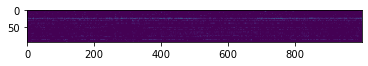

In [11]:
t,act_bla = bk.compute.binSpikes(neurons['BLA'],binSize=0.025)
plt.figure()
plt.imshow(act_bla[:,0:1000])

In [44]:
# using circular shuffling for computing null distribution 
                    # (MUST USE IT IF YOU HAVE STRONG AUTOCORRELATIONS)

nshu = 1000 # defines number of controls to run 
#                     (i.e., number of elements in null hypothesis distribution)

percentile = 99.5 # defines which percentile of control distribution
#                                        will be used as significance threshold


t0 = time.time()
patterns, significance, zactmat = assembly.runPatterns(act_bla,
                                                       nullhyp='mp',
                                                       nshu = nshu,
                                                       percentile = percentile)

tf = np.round(1000*(time.time()-t0))/1000



In [45]:
plt.figure(figsize=(15,5))
for (pi,pattern) in enumerate(patterns[0:7]):
        plt.subplot(1,len(patterns[0:7]),1+pi)
        plt.stem(pattern,use_line_collection = True)
        plt.xlabel('neuron #')
        plt.ylabel('weight')
plt.suptitle('Using circular shuffling, elapsed time: '+str(tf)+' seconds')

Text(0.5, 0.98, 'Using circular shuffling, elapsed time: 25.906 seconds')

In [51]:
import scipy
actmat,b = binSpikes(neurons['BLA'],binSize=0.01)
zactmat = scipy.stats.zscore(actmat,1)
assemblyAct = assembly.computeAssemblyActivity(patterns,zactmat)

for i,pattern in enumerate(patterns):
    members = np.where(np.abs(pattern)>0.15)
    print(members)
    peak_ = np.argmax(assemblyAct[i])
    prange = peak_ + np.array([-1000,1000])
    smps2plot = np.arange(prange[0],prange[1])
    plt.figure()
    bk.plot.rasterPlot(neurons['BLA'],np.array([prange*0.01]),col = 'black')
    bk.plot.rasterPlot(neurons['BLA'][members],np.array([prange*0.01]),col = 'red')
    plt.plot(smps2plot*0.01,assemblyAct[i][smps2plot]/20)
    plt.grid()
    plt.show()

(array([68, 82, 86, 87, 90]),)
(array([ 0,  1, 21, 24, 26, 35, 37, 43, 49, 53, 83]),)
(array([22, 72, 75, 81, 85, 91]),)
(array([13, 22, 45, 55, 59, 64, 83, 86]),)
(array([ 5,  6,  9, 15, 18, 20, 21, 72, 92]),)
(array([16, 19, 23, 59, 60, 61, 73, 83, 90]),)
(array([ 6, 22, 37, 56, 59, 62, 66, 67, 73]),)
(array([69, 84, 86, 93]),)
(array([ 2,  8, 13, 17, 20]),)
(array([10, 11, 21, 29, 32, 38, 67, 70, 86]),)
(array([ 4, 14, 44, 65, 68, 79]),)
(array([51, 57, 64, 74, 86]),)
(array([ 4,  9, 35, 39, 45, 52, 54, 58]),)
(array([ 2,  4,  8,  9, 13, 21, 80, 88]),)
(array([42, 47, 49]),)
(array([ 8, 22, 50, 60, 66, 67, 76]),)
(array([ 6, 31, 48, 53, 63, 73, 78, 86, 89]),)
(array([26, 27, 30]),)
(array([12, 29, 33, 34, 36, 48, 52, 65]),)
(array([ 2,  7, 11, 19, 41, 44]),)
(array([23, 62, 70, 71, 78, 80]),)


<ipython-input-51-9d67d18dc665>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


(array([40, 45, 46, 50, 53, 62, 68]),)
(array([ 3, 10, 11, 12, 24, 25, 30, 50, 58, 63, 78]),)


In [46]:
plt.figure(figsize=(15,6))
s1 = plt.subplot(211)
plt.imshow(act_bla[:,0:150000],cmap='Reds',interpolation='nearest',aspect='auto')
plt.title('z-scored activity matrix')
plt.ylabel('neuron #')

plt.subplot(212,sharex=s1)
plt.plot(assemblyAct[:,0:150000].T,linewidth=1)
plt.title('assembly activities')
plt.xlim(0,14999)
plt.xlabel('time bin')
plt.ylabel('strength')
plt.tight_layout()
plt.show()

NameError: name 'assemblyAct' is not defined